In [1]:
%pip install pandas
%pip install numpy
%pip install regex
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sys
import os
import regex


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict

import time
import datetime

import warnings
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import pickle

import seaborn as sns
from numpy import polyfit
import matplotlib.pyplot as plt

import regex
import time

# TS

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../../data/Combined_data_for_recreate/cluster/Delhi_NO2.csv", index_col=0)
df["sate_NO2"] = df["sate_NO2"]/1e15
df = df.rolling(7).mean()
df = df.reset_index()
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df = df.sort_values("date", ascending=False).reset_index(drop=True)
df = df.iloc[:-7].reset_index(drop=True)
df = df.set_index("date")
df

open_NO2   sate_NO2  Alipur, Delhi - DPCC  \
date                                                      
2021-12-31   97.724107  10.909481             35.427143   
2021-12-30  106.912560  10.652339             35.678571   
2021-12-29  111.902500  10.925853             37.292857   
2021-12-28  119.062976  13.797281             39.214286   
2021-12-27  119.107798  14.268710             42.758571   
...                ...        ...                   ...   
2018-01-12         NaN   9.228396             55.546905   
2018-01-11         NaN   9.956967             56.387381   
2018-01-10         NaN  10.034026             58.762024   
2018-01-09         NaN  11.207947             59.381667   
2018-01-08         NaN  10.999273             60.146667   

            Anand Vihar, Delhi - DPCC  Ashok Vihar, Delhi - DPCC  \
date                                                               
2021-12-31                  83.331429                  48.208571   
2021-12-30                  84.662857                  48.631429   
2021-12-29                  90.461429                  52.828571   
2021-12-28                  99.774286                  58.028571   
2021-12-27                 100.188571                  59.612857   
...                               ...                        ...   
2018-01-12                 120.040000                  72.451479   
2018-01-11                 113.477143                  71.070050   
2018-01-10                 111.435714                  72.117907   
2018-01-09                 108.321429                  70.578622   
2018-01-08                 100.471429                  69.317193   

            Aya Nagar, Delhi - IMD  Bawana, Delhi - DPCC  \
date                                                       
2021-12-31               22.914286             21.127143   
2021-12-30               23.571429             23.050000   
2021-12-29               24.438571             25.821429   
2021-12-28               25.958571             27.388571   
2021-12-27               26.900000             28.138571   
...                            ...                   ...   
2018-01-12               15.980000             28.211862   
2018-01-11               15.984286             28.211862   
2018-01-10               16.077143             28.211862   
2018-01-09               16.337143             28.211862   
2018-01-08               16.634286             28.211862   

            Burari Crossing, Delhi - IMD  Chandni Chowk, Delhi - IITM  \
date                                                                    
2021-12-31                     43.562381                   198.921429   
2021-12-30                     43.775714                   199.955714   
2021-12-29                     46.495714                   196.415714   
2021-12-28                     51.350000                   196.505714   
2021-12-27                     57.363571                   192.385714   
...                                  ...                          ...   
2018-01-12                     64.072857                    65.778571   
2018-01-11                     66.391429                    66.297143   
2018-01-10                     68.905714                    69.507143   
2018-01-09                     69.675714                    68.325714   
2018-01-08                     70.838571                    69.717143   

            CRRI Mathura Road, Delhi - IMD  ...  Pusa, Delhi - DPCC  \
date                                        ...                       
2021-12-31                       19.932857  ...           71.820000   
2021-12-30                       19.645714  ...           72.208571   
2021-12-29                       20.230000  ...           77.708571   
2021-12-28                       21.277143  ...           83.595714   
2021-12-27                       22.182857  ...           87.931429   
...                                    ...  ...                 ...   
2018-01-12                       31.472857  ...           70.1

In [4]:
from numpy import polyfit # fit polynomial: x^2*b1 + x*b2 + ... + bn
import matplotlib.pyplot as plt
df_name = "Delhi"
seasonal_coefs = {}
inits_diff = {}
diff_df = pd.DataFrame()
FD_df = pd.DataFrame()
for y_label in df:
    y = df[y_label].dropna()
    x = y.reset_index()["date"].dt.dayofyear
    degree = 7
    coef = polyfit(x, y, degree)
    seasonal_coefs[y_label] = coef

    curve = list()
    for i in range(len(x)):
        value = coef[-1]
        for d in range(degree):
            value += x[i]**(degree-d) * coef[d]
        curve.append(value)
    
    diff_df = diff_df.join(pd.DataFrame(y-np.array(curve)), how="outer")
diff_df = diff_df.reset_index()
diff_df = diff_df.sort_values("date", ascending=False)
diff_df = diff_df.set_index("date") 
display(diff_df)
inits_diff[df_name] = diff_df.iloc[0,0]
    
FD_df = (diff_df - diff_df.shift(1)).iloc[1:]


open_NO2  sate_NO2  Alipur, Delhi - DPCC  \
date                                                    
2021-12-31  15.694486 -0.301889            -14.848151   
2021-12-30  23.789820 -0.493284            -16.064663   
2021-12-29  27.734312 -0.157866            -15.828163   
2021-12-28  33.896734  2.771899            -15.197114   
2021-12-27  32.990588  3.298363            -12.858494   
...               ...       ...                   ...   
2018-01-12        NaN -0.902851              3.236286   
2018-01-11        NaN -0.089617              3.766682   
2018-01-10        NaN  0.083707              5.818057   
2018-01-09        NaN  1.366105              6.100735   
2018-01-08        NaN  1.278748              6.514548   

            Anand Vihar, Delhi - DPCC  Ashok Vihar, Delhi - DPCC  \
date                                                               
2021-12-31                 -38.346237                   2.474374   
2021-12-30                 -36.502745                   1.090764   
2021-12-29                 -30.265229                   3.560858   
2021-12-28                 -20.580907                   7.111846   
2021-12-27                 -19.857210                   7.123775   
...                               ...                        ...   
2018-01-12                  19.916421                  13.378876   
2018-01-11                  14.491686                  12.509164   
2018-01-10                  13.709121                  14.128688   
2018-01-09                  11.980777                  13.223854   
2018-01-08                   5.650352                  12.662581   

            Aya Nagar, Delhi - IMD  Bawana, Delhi - DPCC  \
date                                                       
2021-12-31               11.568442            -13.517417   
2021-12-30               10.847367            -12.341242   
2021-12-29               10.414595            -10.297738   
2021-12-28               10.710004             -9.439336   
2021-12-27               10.499263             -9.378507   
...                            ...                   ...   
2018-01-12                0.240646            -13.400013   
2018-01-11                0.405673            -13.140826   
2018-01-10                0.662621            -12.839676   
2018-01-09                1.089768            -12.494393   
2018-01-08                1.556799            -12.102739   

            Burari Crossing, Delhi - IMD  Chandni Chowk, Delhi - IITM  \
date                                                                    
2021-12-31                      2.693186                    97.136962   
2021-12-30                      3.307253                   101.784279   
2021-12-29                      6.372478                   101.643199   
2021-12-28                     11.520012                   104.927272   
2021-12-27                     17.778264                   103.805493   
...                                  ...                          ...   
2018-01-12                     22.090189                    -0.970529   
2018-01-11                     24.222048                    -0.995721   
2018-01-10                     26.561480                     1.701816   
2018-01-09                     27.170276                     0.042662   
2018-01-08                     28.187454                     0.994693   

            CRRI Mathura Road, Delhi - IMD  ...  Pusa, Delhi - DPCC  \
date                                        ...                       
2021-12-31                      -21.075174  ...           15.086709   
2021-12-30                      -20.048455  ...           13.172684   
2021-12-29                      -18.350167  ...           16.479786   
2021-12-28                      -16.377169  ...           20.281451   
2021-12-27                      -14.722432  ...           22.636841   
...                                    ...  ...                 ...   
2018-01-12                      -11.109365  ...            5.583855   
2018-01-11      

In [5]:
train = FD_df[FD_df.iloc[:,0].isna() == False]
pred = FD_df[FD_df.iloc[:,0].isna()]

X_pred = pred.iloc[:,1:].fillna(method="ffill")
y_train = train.iloc[:,0]
X_train = train.iloc[:,1:].dropna(axis=1)

In [6]:
from xgboost import XGBRegressor
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_pred)
y_val = model.predict(X_train)
result = [pd.Series(y_pred, X_pred.index, name="predict"), y_train, pd.Series(y_val, X_train.index, name="val")]

<AxesSubplot:xlabel='date'>

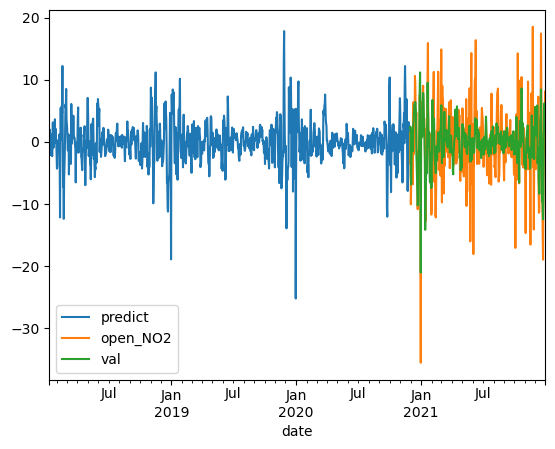

In [7]:
pd.DataFrame(result).T.plot()

In [8]:
init_diff = inits_diff["Delhi"]
coef = seasonal_coefs["open_NO2"]
pred_result = pd.Series(y_pred, index=X_pred.index)
temp = FD_df[["open_NO2"]].join(pd.DataFrame(None, index=diff_df.index), how="outer").sort_index(ascending=False)
temp["pred"] = diff_df.iloc[:,0].isna()
temp["open_NO2"][temp["pred"]] = y_pred
temp["recover"] = None

temp = temp.sort_index(ascending=False)
for i, date in enumerate(temp.index):
    temp_diff = temp["open_NO2"].iloc[:i+1].sum()+init_diff
    doy = date.dayofyear
    value = coef[-1]
    for d in range(degree):
        value += doy**(degree-d) * coef[d]
    temp["recover"].iloc[i] = temp_diff + value
temp


open_NO2   pred     recover
date                                   
2021-12-31       NaN  False   97.724107
2021-12-30  8.095334  False   106.91256
2021-12-29  3.944491  False    111.9025
2021-12-28  6.162422  False  119.062976
2021-12-27 -0.906146  False  119.107798
...              ...    ...         ...
2018-01-12 -2.116778   True   61.954936
2018-01-11 -1.396317   True   59.277552
2018-01-10  1.972763   True   59.854157
2018-01-09 -0.794517   True   57.543265
2018-01-08 -0.366606   True   55.534793

[1454 rows x 3 columns]

<AxesSubplot:xlabel='date', ylabel='recover'>

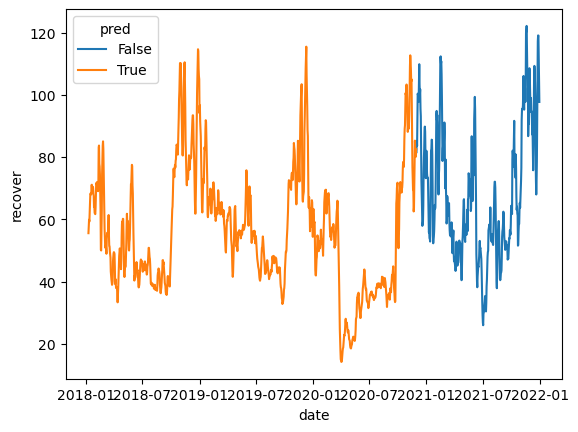

In [9]:
sns.lineplot(data=temp, x=temp.index, y=temp.recover, hue=temp.pred)

In [10]:
non_ts = pd.read_csv('../../data/API Recreate/pred/csv/NO2_pred.csv')["Delhi_NO2"][7:][::-1]

In [11]:
non_ts_df = pd.DataFrame({"date":list(temp.index),"pred":temp.pred}).set_index("date")
non_ts_df["value"] = non_ts.values
non_ts_df

pred       value
date                         
2021-12-31  False   79.112500
2021-12-30  False   89.023750
2021-12-29  False   76.913750
2021-12-28  False  101.418750
2021-12-27  False   96.963333
...           ...         ...
2018-01-12   True   83.841233
2018-01-11   True   74.834512
2018-01-10   True   76.615387
2018-01-09   True   75.424796
2018-01-08   True   74.282612

[1454 rows x 2 columns]

Text(0.5, 0.98, 'Delhi_NO2')

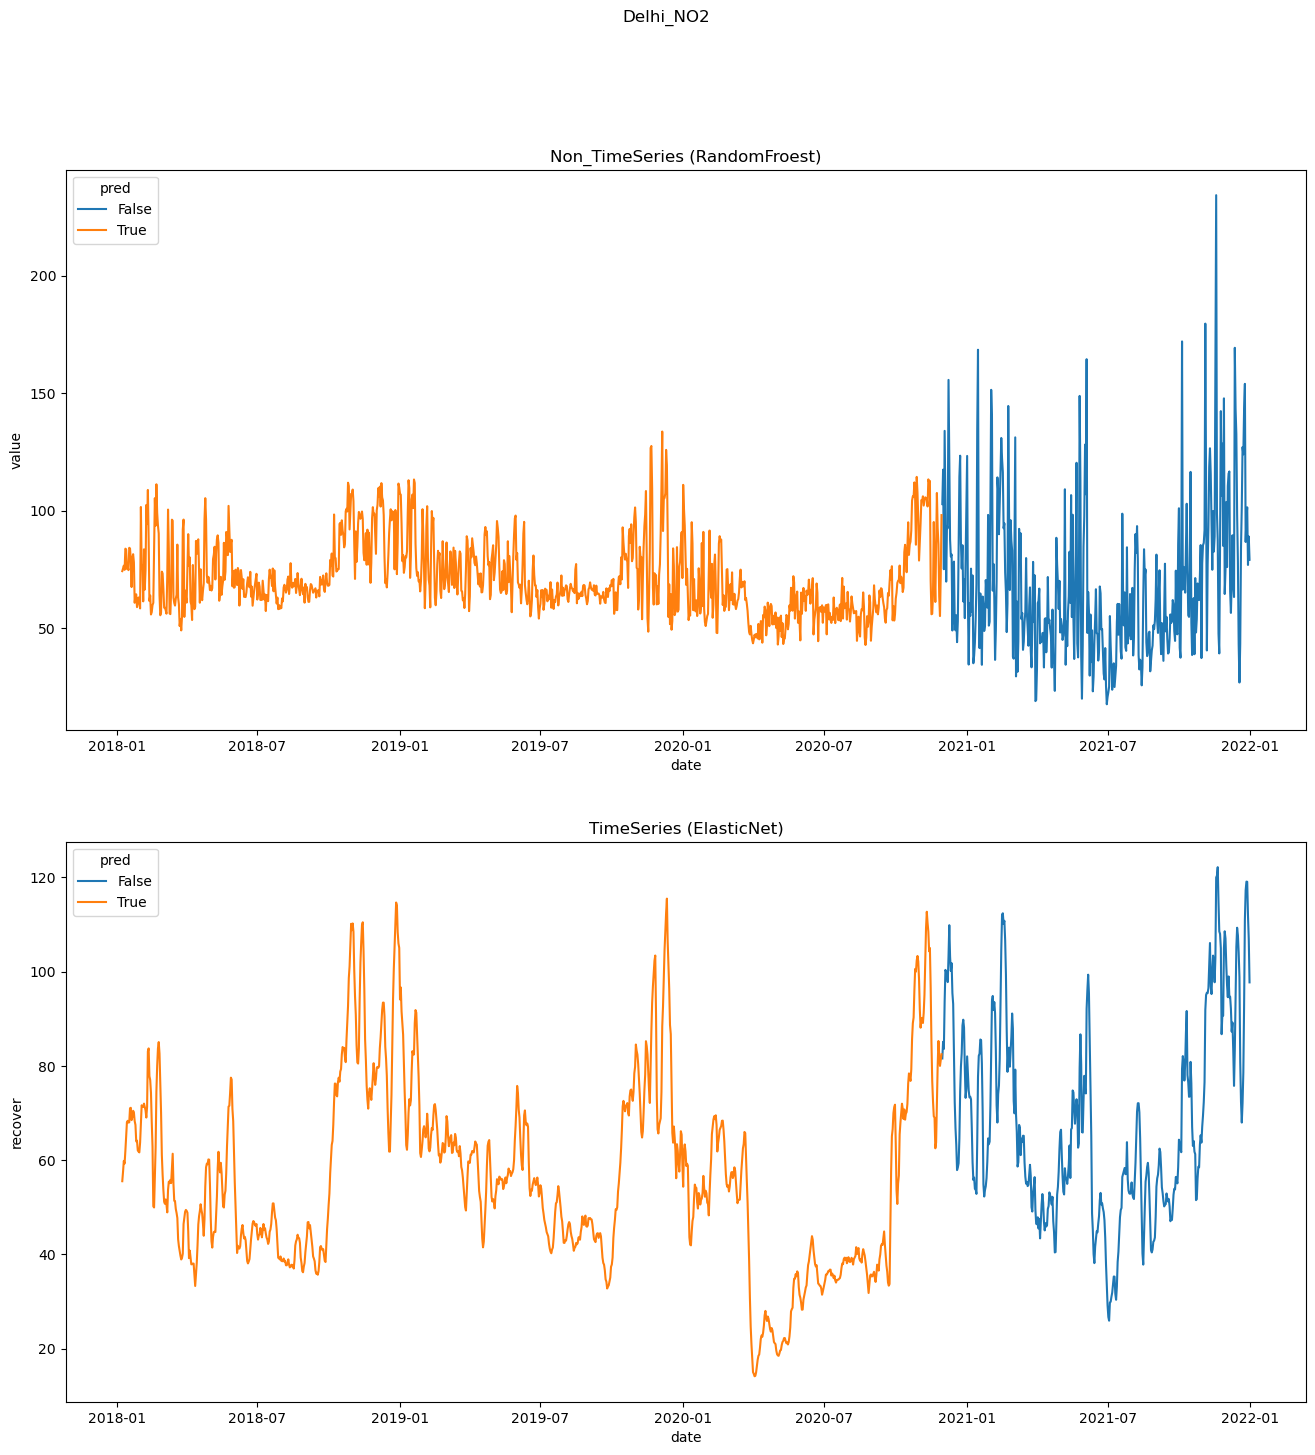

In [12]:
plt.figure(figsize=(16, 16))
plt.subplot(2,1,1)
sns.lineplot(data=non_ts_df, x=non_ts_df.index, y=non_ts_df.value, hue=non_ts_df.pred)
plt.title("Non_TimeSeries (RandomFroest)")
plt.subplot(2,1,2)
sns.lineplot(data=temp, x=temp.index, y=temp.recover, hue=temp.pred)
plt.title("TimeSeries (ElasticNet)")
plt.suptitle("Delhi_NO2")


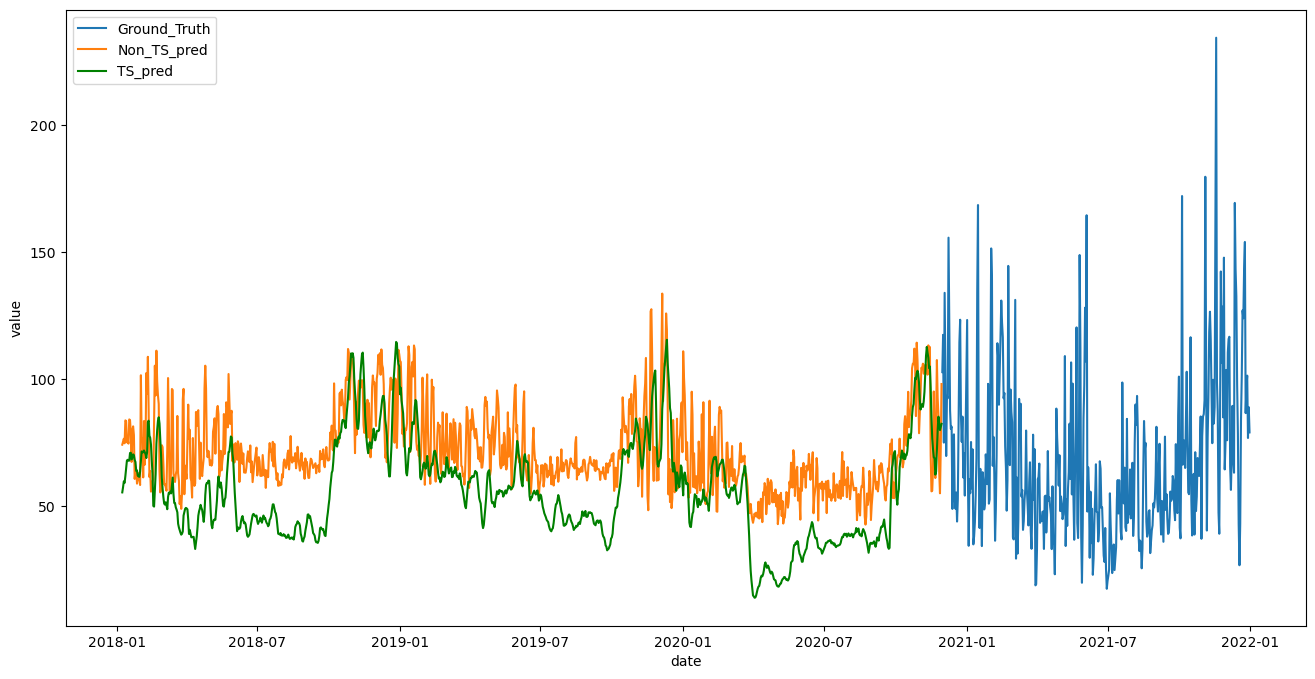

In [13]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=non_ts_df, x=non_ts_df.index, y=non_ts_df.value, hue=non_ts_df.pred, legend=False)

#plt.title("Non_TimeSeries (RandomFroest)")
sns.lineplot(data=temp[temp["pred"]], x=temp[temp["pred"]].index, y=temp[temp["pred"]].recover, color="green")
#plt.title("TimeSeries (ElasticNet)")
#plt.suptitle("Delhi_NO2")
plt.legend(["Ground_Truth", "Non_TS_pred", "TS_pred"])

In [14]:
filedir = "../../data/Combined_data_for_recreate/cluster/"
city_files_NO2 = [x for x in os.listdir(filedir)  if regex.match(".*_NO2.csv", x)]
city_files_SO2 = [x for x in os.listdir(filedir)  if regex.match(".*_SO2.csv", x)]
city_files_PM25 = [x for x in os.listdir(filedir)  if regex.match(".*_PM25.csv", x)]
city_files_CO = [x for x in os.listdir(filedir)  if regex.match(".*_CO.csv", x)]
NO2 = {}
SO2 = {}  
PM25 = {}
CO = {}
for gas, record_dict, gas_name in [(city_files_NO2, NO2, "NO2"), (city_files_SO2, SO2, "SO2"), (city_files_PM25, PM25, "PM25"), (city_files_CO, CO, "CO")]:
    for file in gas:
        time_start = time.time()
        df = pd.read_csv(filedir+file, index_col=0)
        if f"sate_{gas_name}" in df.columns:
            df[f"sate_{gas_name}"] = MinMaxScaler().fit_transform(df[f"sate_{gas_name}"].values.reshape(-1, 1))
        df = df.rolling(7).mean()
        df = df.reset_index()
        df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
        df = df.sort_values("date", ascending=False).reset_index(drop=True)
        df = df.iloc[:-7].reset_index(drop=True)
        df = df.set_index("date")

        seasonal_coefs = {}
        inits_diff = {}
        diff_df = pd.DataFrame()
        FD_df = pd.DataFrame()
        
        for y_label in df:
            y = df[y_label].dropna()
            x = y.reset_index()["date"].dt.dayofyear
            degree = 7
            coef = polyfit(x, y, degree)
            seasonal_coefs[y_label] = coef

            curve = list()
            for i in range(len(x)):
                value = coef[-1]
                for d in range(degree):
                    value += x[i]**(degree-d) * coef[d]
                curve.append(value)
            
            diff_df = diff_df.join(pd.DataFrame(y-np.array(curve)), how="outer")

        
        
        diff_df = diff_df.reset_index()
        diff_df = diff_df.sort_values("date", ascending=False)
        diff_df = diff_df.set_index("date") 
        inits_diff[file] = diff_df.iloc[0,0]
        
        FD_df = (diff_df - diff_df.shift(1)).iloc[1:]

        train = FD_df[FD_df.iloc[:,0].isna() == False]
        pred = FD_df[FD_df.iloc[:,0].isna()]
        
        X_pred = pred.iloc[:,1:].fillna(method="ffill")
        y_train = train.iloc[:,0]
        X_train = train.iloc[:,1:].dropna(axis=1)
        model = RandomForestRegressor()    
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_pred)
        
        init_diff = inits_diff[file]
        coef = seasonal_coefs[f"open_{gas_name}"]
        pred_result = pd.Series(y_pred, index=X_pred.index)
        temp = FD_df[[f"open_{gas_name}"]].join(pd.DataFrame(None, index=diff_df.index), how="outer").sort_index(ascending=False)
        temp["pred"] = diff_df.iloc[:,0].isna()
        temp[f"open_{gas_name}"][temp["pred"]] = y_pred
        temp["recover"] = None
        
        temp = temp.sort_index(ascending=False)
        for i, date in enumerate(temp.index):
            temp_diff = temp[f"open_{gas_name}"].iloc[:i+1].sum()+init_diff
            doy = date.dayofyear
            value = coef[-1]
            for d in range(degree):
                value += doy**(degree-d) * coef[d]
            temp["recover"].iloc[i] = temp_diff + value
        


        record_dict[file.replace(".csv", "")] = temp["recover"]
        time_elapsd = time.time()-time_start
        print(file.split(f"_{gas_name}.csv")[0]+f"_{gas_name} Finished, time used: {time_elapsd:.2f} seconds")
    pd.DataFrame(record_dict).to_csv(f"../../data/API Recreate/pred/csv/{gas_name}_TS_pred.csv")
    

Agartala_NO2 Finished, time used: 0.82 seconds
Agra_NO2 Finished, time used: 1.14 seconds
Aizwal_NO2 Finished, time used: 0.66 seconds
Amritsar_NO2 Finished, time used: 0.78 seconds
Asansol_NO2 Finished, time used: 0.75 seconds
Aurangabad_NO2 Finished, time used: 0.81 seconds
Bareilly_NO2 Finished, time used: 0.81 seconds
Belgaum_NO2 Finished, time used: 0.75 seconds
Bengaluru_NO2 Finished, time used: 1.40 seconds
Bhopal_NO2 Finished, time used: 0.76 seconds
Chandigarh_NO2 Finished, time used: 0.85 seconds
Chennai_NO2 Finished, time used: 1.25 seconds
Coimbatore_NO2 Finished, time used: 0.75 seconds
Dehradun_NO2 Finished, time used: 0.75 seconds
Delhi_NO2 Finished, time used: 3.45 seconds
Faridabad_NO2 Finished, time used: 1.02 seconds
Gandhinagar_NO2 Finished, time used: 0.87 seconds
Gangtok_NO2 Finished, time used: 0.81 seconds
Ghaziabad_NO2 Finished, time used: 1.13 seconds
Gorakhpur_NO2 Finished, time used: 0.89 seconds
Gwalior_NO2 Finished, time used: 0.91 seconds
Hyderabad_NO2 Fi